In [1]:
import numpy as np                
import pandas as pd               
import matplotlib                 
import matplotlib.pyplot as plt
import seaborn as sns               
plt.style.use('fivethirtyeight')
%matplotlib inline
import plotly as plotly            
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
import sklearn as sk
import matplotlib.image as mpimg
%matplotlib inline

data=pd.read_csv('AB_NYC_2019.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
print(data.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [3]:
data.shape

(48895, 16)

In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df = data.drop(columns=['name','id','host_name','last_review'])
df.fillna(0)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [6]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [7]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [8]:
len(df['neighbourhood'].unique().tolist())

221

In [9]:
df.shape

(48895, 12)

In [10]:
def replace_room_type (val):
    if val == "Private room":
        return 1
    elif val == "Entire home/apt":
        return 2
    elif val == "Shared room":
        return 3

def replace_neighbourhood_group (val):
    if val == "Brooklyn":
        return 1
    elif val == "Manhattan":
        return 2
    elif val == "Queens":
        return 3
    elif val == "Staten Island":
        return 4
    elif val == "Bronx":
        return 5

# Convert 'room_type' and 'neighbourhood_group' to numerical values
df["room_type"] = df["room_type"].apply(replace_room_type, 'Private room')
df["neighbourhood_group"] = df["neighbourhood_group"].apply(replace_neighbourhood_group, 'Brooklyn')
df.head()
# Convert 'neighbourhood' to numerical values
df["neighbourhood"] = df["neighbourhood"].astype('category')
df["neighbourhood"] = df["neighbourhood"].cat.codes
df["neighbourhood"] = pd.factorize(df['neighbourhood'])[0] + 1
df.head(25)

# Convert 'host_id' to numerical values
df["host_id"] = df["host_id"].astype('category')
df["host_id"] = df["host_id"].cat.codes
df["host_id"] = pd.factorize(df['host_id'])[0] + 1

# Data after preprocessing
df.head(25)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1,1,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,2,2,40.75362,-73.98377,2,225,1,45,0.38,2,355
2,3,2,3,40.80902,-73.94190,1,150,3,0,NaN,1,365
3,4,1,4,40.68514,-73.95976,2,89,1,270,4.64,1,194
4,5,2,5,40.79851,-73.94399,2,80,10,9,0.10,1,0
5,6,2,6,40.74767,-73.97500,2,200,3,74,0.59,1,129
6,7,1,7,40.68688,-73.95596,1,60,45,49,0.40,1,0
7,8,2,8,40.76489,-73.98493,1,79,2,430,3.47,1,220
8,9,2,9,40.80178,-73.96723,1,79,2,118,0.99,1,0
9,10,2,10,40.71344,-73.99037,2,150,1,160,1.33,4,188


In [11]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [12]:
df.corr().style.background_gradient(cmap='coolwarm')

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1,0.0876998,0.111262,-0.00572828,0.0835896,-0.0184574,0.00917154,-0.0424943,-0.299446,0.183088,0.0643377,0.0219574
neighbourhood_group,0.0876998,1,0.486304,0.53282,0.281727,-0.00444146,0.00267183,-0.000739058,0.0114542,0.0780363,0.0445101,0.123287
neighbourhood,0.111262,0.486304,1,-0.139798,0.335691,-0.0336437,-0.0549632,-0.0283444,0.0107914,0.0987716,0.00463747,0.124145
latitude,-0.00572828,0.53282,-0.139798,1,0.0847884,-0.00275741,0.0339387,0.0248693,-0.0153888,-0.0187577,0.0195174,-0.0109835
longitude,0.0835896,0.281727,0.335691,0.0847884,1,-0.160599,-0.150019,-0.0627471,0.0590943,0.138516,-0.114713,0.0827307
room_type,-0.0184574,-0.00444146,-0.0336437,-0.00275741,-0.160599,1,0.206027,0.0667668,-0.0224454,-0.0282549,0.096963,0.0265017
price,0.00917154,0.00267183,-0.0549632,0.0339387,-0.150019,0.206027,1,0.0427993,-0.0479542,-0.0505641,0.0574717,0.0818288
minimum_nights,-0.0424943,-0.000739058,-0.0283444,0.0248693,-0.0627471,0.0667668,0.0427993,1,-0.0801161,-0.124905,0.12796,0.144303
number_of_reviews,-0.299446,0.0114542,0.0107914,-0.0153888,0.0590943,-0.0224454,-0.0479542,-0.0801161,1,0.589407,-0.0723761,0.172028
reviews_per_month,0.183088,0.0780363,0.0987716,-0.0187577,0.138516,-0.0282549,-0.0505641,-0.124905,0.589407,1,-0.0473121,0.163732


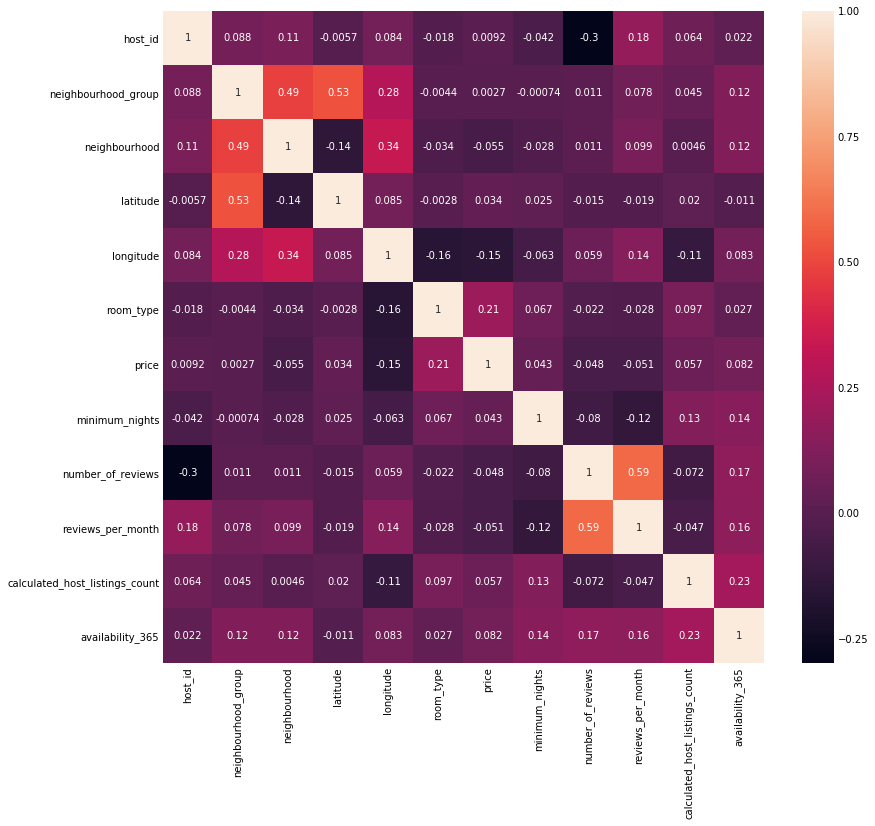

In [13]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(df.corr(), annot=True)

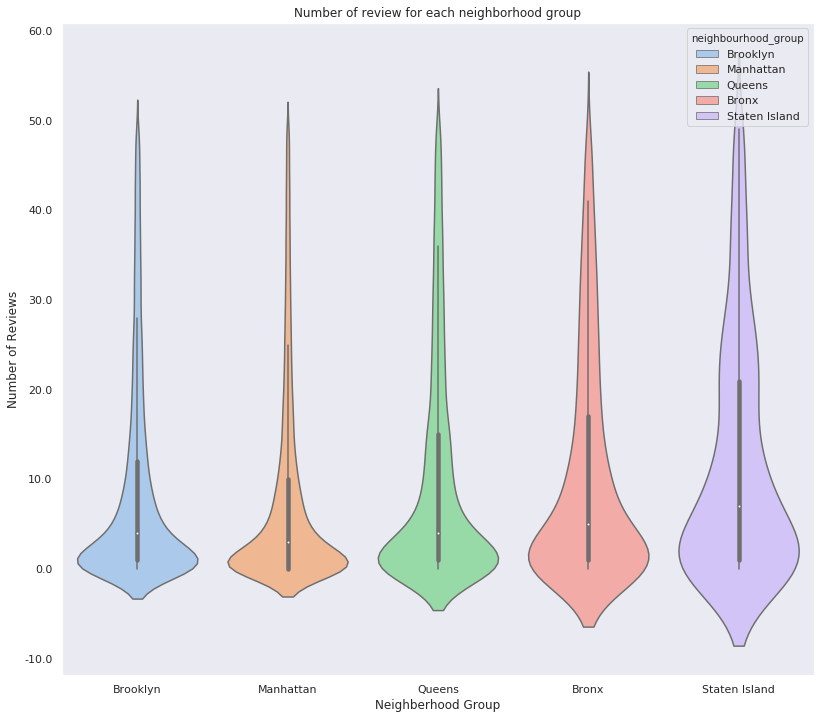

In [14]:
sns.set(style="dark")
max_review = 50

reviewbnb = data[data.number_of_reviews < max_review]

fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.violinplot(ax=ax, x="neighbourhood_group", y="number_of_reviews", 
                                          hue="neighbourhood_group", data=reviewbnb, 
                                          palette="pastel", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='Number of Reviews', 
                             title='Number of review for each neighborhood group')
ylabels = ['{}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

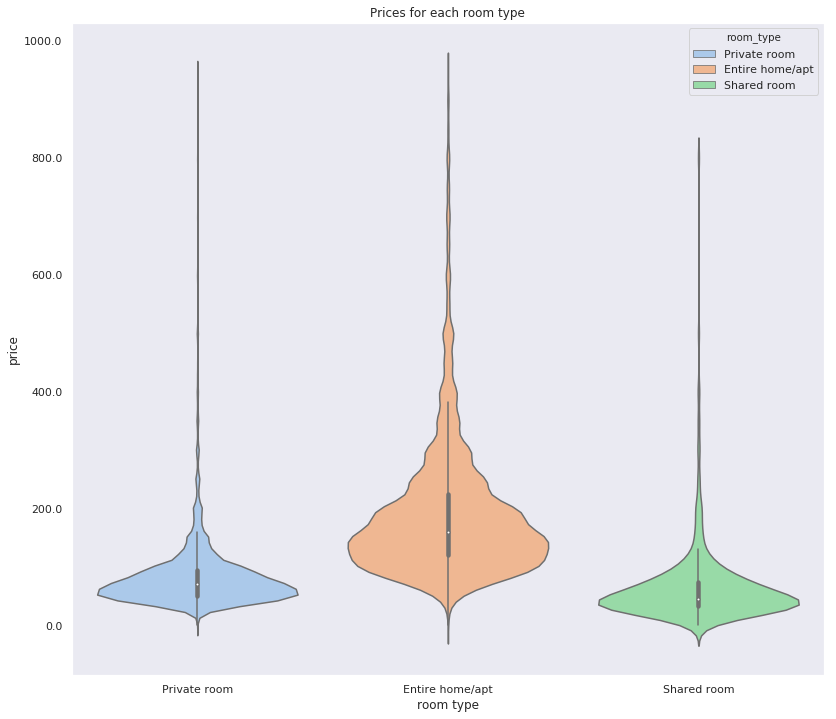

In [15]:
sns.set(style="dark")
price = 950

priceType = data[data.price < price]

fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.violinplot(ax=ax, x="room_type", y="price", 
                                          hue="room_type", data=priceType, 
                                          palette="pastel", dodge=False)
density_neigh_price_plot.set(xlabel='room type', ylabel='price', 
                             title='Prices for each room type')
ylabels = ['{}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

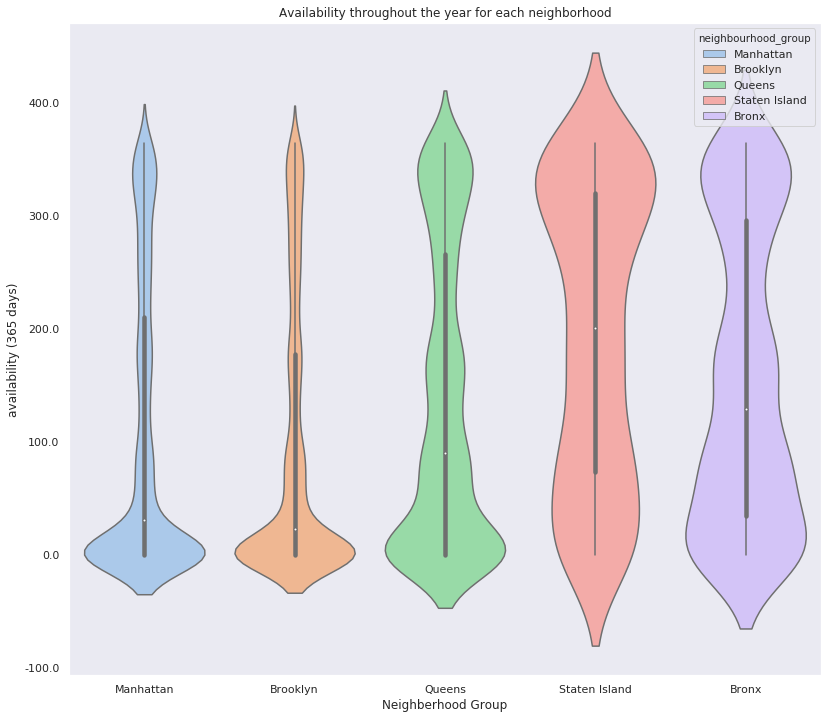

In [16]:
sns.set(style="dark")
days = 365

avl = data[data.availability_365 < days]

fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.violinplot(ax=ax, x="neighbourhood_group", y="availability_365", 
                                          hue="neighbourhood_group", data=avl, 
                                          palette="pastel", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='availability (365 days)', 
                             title='Availability throughout the year for each neighborhood')
ylabels = ['{}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

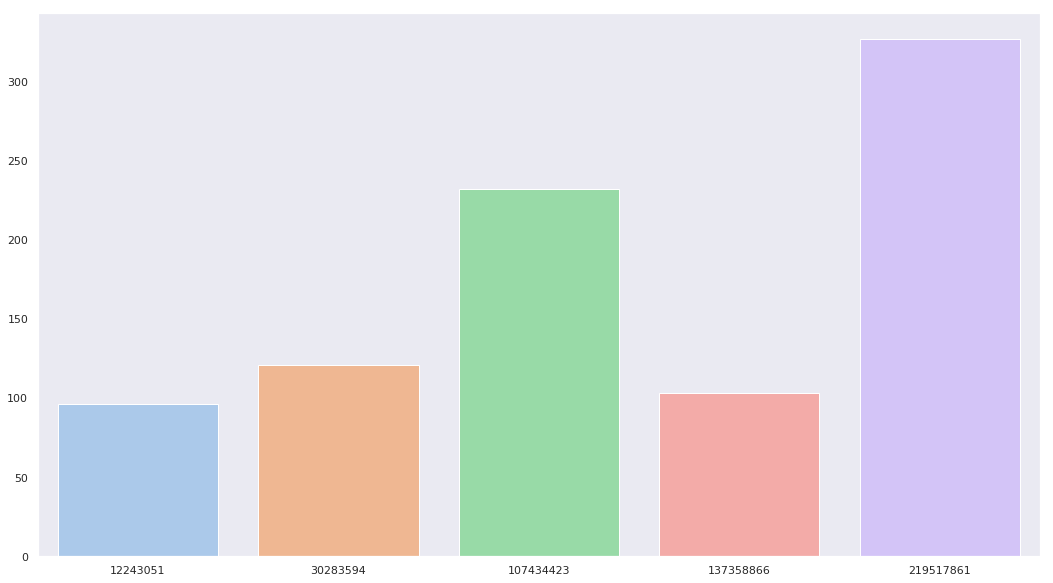

In [17]:
df1 = data.host_id.value_counts()[:5]
f,ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x = df1.index,y=df1.values,palette="pastel")
plt.show()

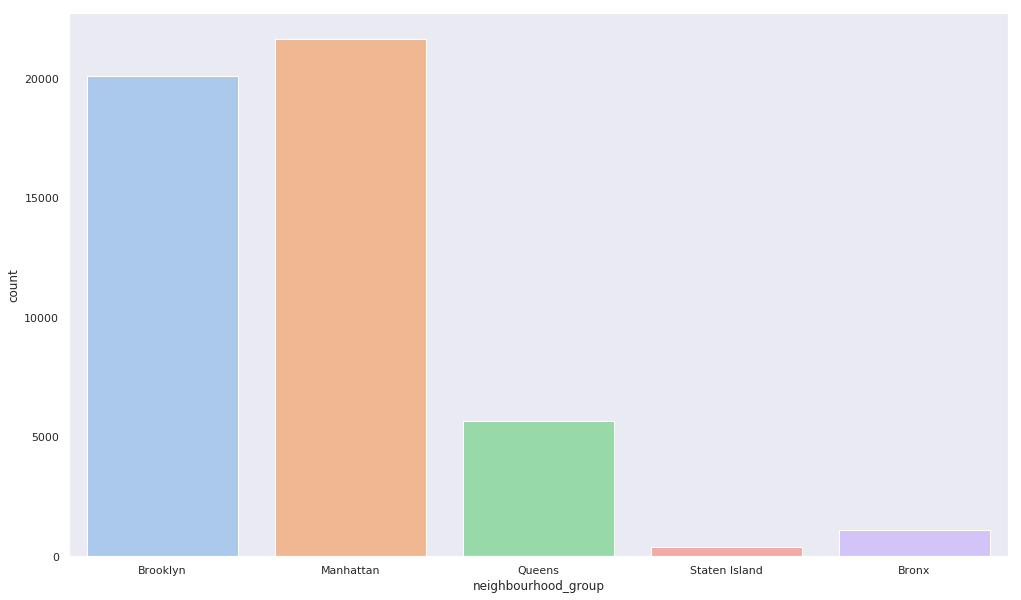

In [18]:
f,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data.neighbourhood_group,palette="pastel")
plt.show()

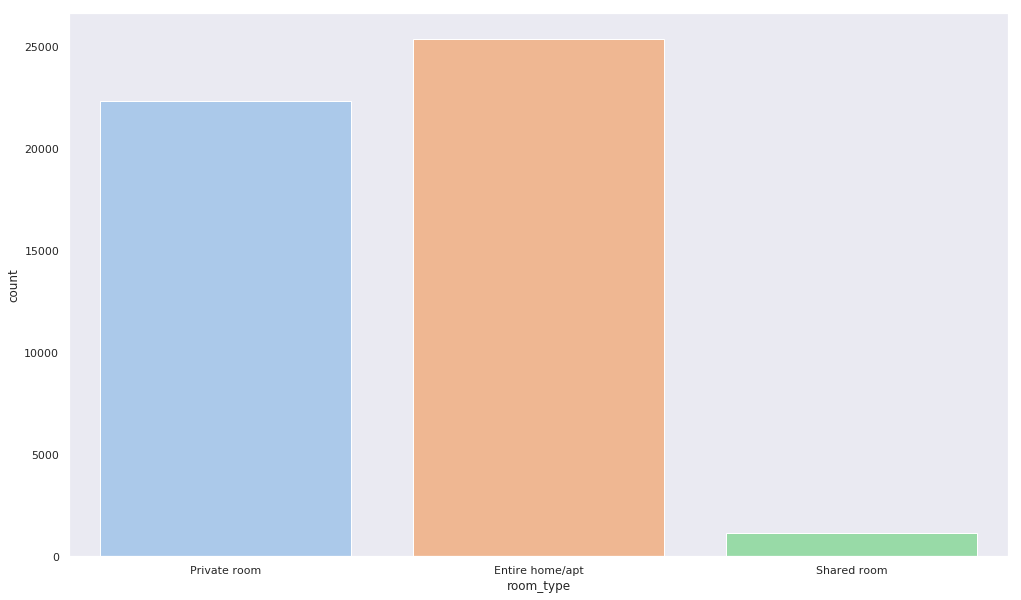

In [19]:
f,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(data.room_type,palette="pastel")
plt.show()

In [20]:
lm = LinearRegression()

X = df[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error 

predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
     """.format(np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100
        ))


        Mean Squared Error: 189.370604043
        R2 Score: 9.52278108111
     


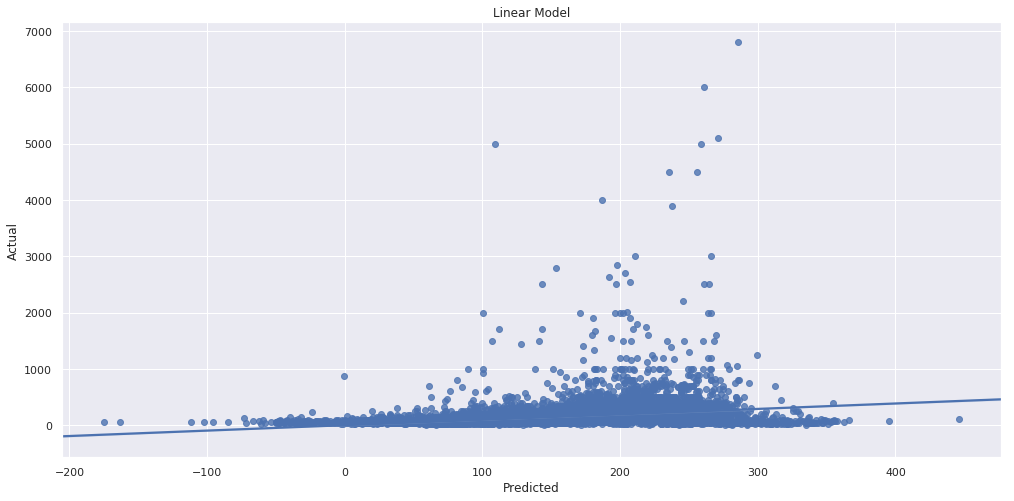

In [22]:
plt.figure(figsize=(15,8))
sns.regplot(predicts, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Linear Model")
plt.grid(True)
plt.show()

In [23]:
def detect_outlier(df):

    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)


    for y in df:
        z_score= (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            df.replace(y, np.nan, inplace=True)

In [24]:
detect_outlier(df.price)
detect_outlier(df.number_of_reviews)
detect_outlier(df.minimum_nights)
detect_outlier(df.availability_365)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1,1,40.64749,-73.97237,1,149.0,1.0,9.0,0.21,6,365
1,2,2,2,40.75362,-73.98377,2,225.0,1.0,45.0,0.38,2,355
2,3,2,3,40.80902,-73.94190,1,150.0,3.0,0.0,0.00,1,365
3,4,1,4,40.68514,-73.95976,2,89.0,1.0,NaN,4.64,1,194
4,5,2,5,40.79851,-73.94399,2,80.0,10.0,9.0,0.10,1,0


In [25]:
dropdata = df.dropna()

In [26]:
dropdata.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [27]:
dropdata.shape

(46981, 12)

In [28]:
lq = LinearRegression()

X_o = dropdata[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y_o = dropdata['price']


X_train, X_test, y_train, y_test = train_test_split(X_o, y_o, test_size=0.3, random_state=10)

lq.fit(X_train,y_train)
print(X_train.shape)
print(X_test.shape)

(32886, 11)
(14095, 11)


In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error 

predicts = lq.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100
        ))


        Mean Squared Error: 93.4004391482
        R2 Score: 24.4491124899
     


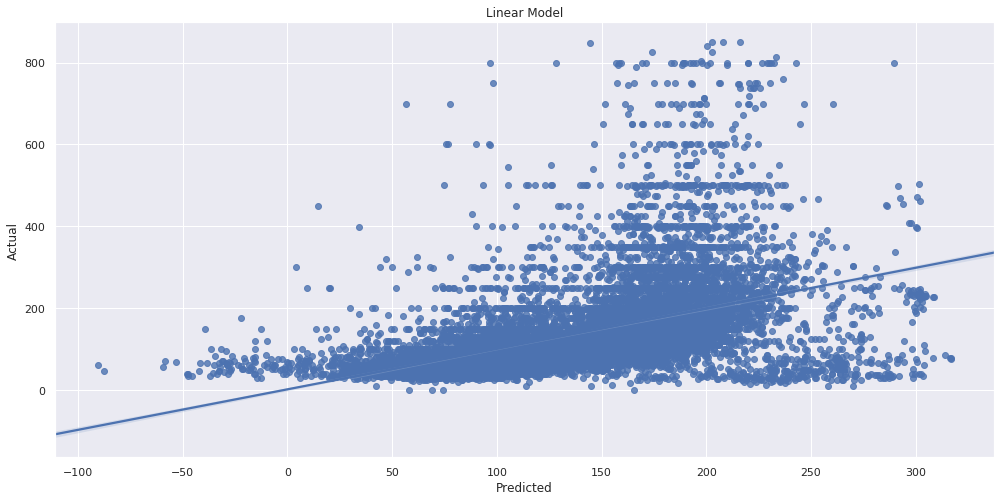

In [30]:
plt.figure(figsize=(15,8))
sns.regplot(predicts, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Linear Model")
plt.grid(True)
plt.show()

In [31]:
## Clustering Algorithms - KMeans, Cosine KMeans

In [ ]:
## Choosing a value for k 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# K-Means clusters data in n groups of equal variance by minimizing 
# inertia, also known as, within-cluster sum-of-squares

scores = [KMeans(n_clusters=i+2).fit(dropdata).inertia_ for i in range(10)]

sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("Inertia of K-Means vs. Number of Clusters")


In [2]:
## Error associated with each clustering algorithm

from sklearn import preprocessing
from sklearn.metrics import silhouette_score

# K-Means
kmeans = KMeans(n_clusters=5).fit(dropdata)

# Cosine K-Means
normalized_vectors = preprocessing.normalize(dropdata)
normalized_kmeans = KMeans(n_clusters=4).fit(normalized_vectors)

# Show associated silhouette score (ranges from -1 to 1; 1 is ideal)
print('kmeans: ', silhouette_score(dropdata, kmeans.labels_, metric='euclidean'))
print('cosine kmeans: ', silhouette_score(normalized_vectors, normalized_kmeans.labels_, metric='cosine'))

NameError: name 'KMeans' is not defined

In [ ]:
#PCA showing K-Means

axes = ['x', 'y', 'z']
pca_df = pd.DataFrame(PCA(3).fit_transform(dropdata))
pca_df.rename({i:axes[i] for i in range(3)}, axis=1, inplace=True)
pca_df['labels'] = normalized_kmeans.labels_

sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.labels, palette="Set2")


In [ ]:
## Random Forest Classifier

import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as mp


x = dropdata.drop(columns=['neighbourhood_group'])
y = dropdata['neighbourhood_group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

clf = RandomForestClassifier(n_estimators=20)
clf.fit(x_train, y_train)
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)


from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, pred_test))

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')